In [29]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error

from datetime import datetime,timedelta

import matplotlib.pyplot as plt
%matplotlib inline

### Loading the CSV file TractorSales.csv

In [30]:
df_tractor = pd.read_csv('TractorSales.csv')
df_tractor.head()

,Month-Year,Number of Tractor Sold
0,3-Jan,141
1,3-Feb,157
2,3-Mar,185
3,3-Apr,199
4,3-May,203


#### 1. Code to convert/split the data as per frequency.

In [31]:
df_tractor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


#### 2.  Code to extract the time-series and then plot the graph providing the inference's accordingly.

In [32]:
dates = pd.date_range(start = "2003-01-01", freq="MS", periods= len(df_tractor))
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [33]:
import calendar
df_tractor["Months"] = dates.month
df_tractor["Months"] = df_tractor["Months"].apply(lambda x: calendar.month_abbr[x]) #Because of this line we will get(Jan, Feb) instead of (1st, 2nd) month

df_tractor["Year"] = dates.year

In [34]:
df_tractor.head()

,Month-Year,Number of Tractor Sold,Months,Year
0,3-Jan,141,Jan,2003
1,3-Feb,157,Feb,2003
2,3-Mar,185,Mar,2003
3,3-Apr,199,Apr,2003
4,3-May,203,May,2003


In [35]:
df_tractor.drop(columns=['Month-Year'],axis=1,inplace=True)

In [36]:
df_tractor.head()

,Number of Tractor Sold,Months,Year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [37]:
df_tractor.set_index(dates,inplace=True)

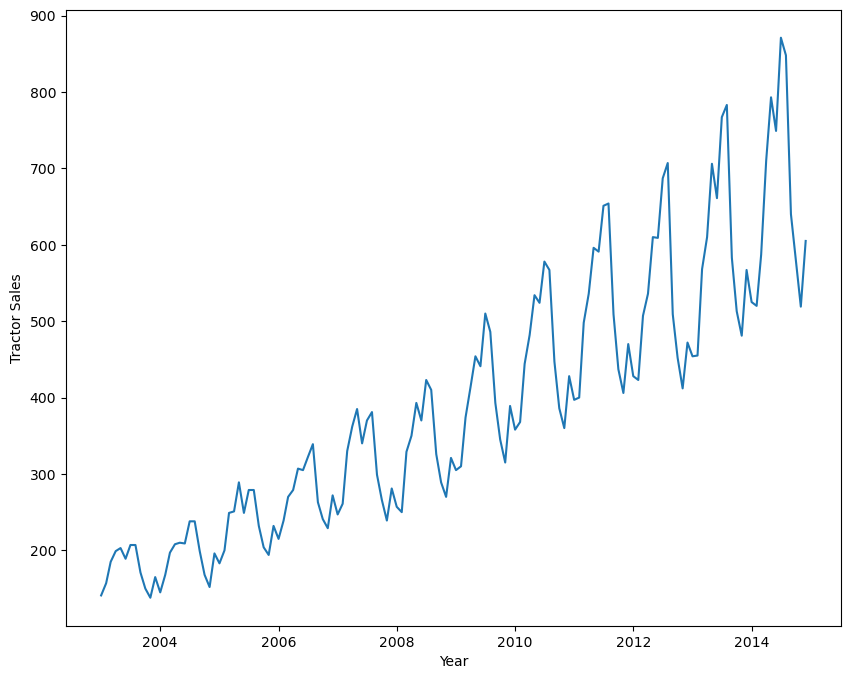

In [38]:
df1 = df_tractor['Number of Tractor Sold']
plt.figure(figsize=(10,8))
plt.plot(df1)
plt.xlabel("Year")
plt.ylabel("Tractor Sales")
plt.show()

#### 3. Code to determine the rolling statistics(i.e - Original,Rolling mean,Rolling Standard deviation) and then plotting a graph accordingly.


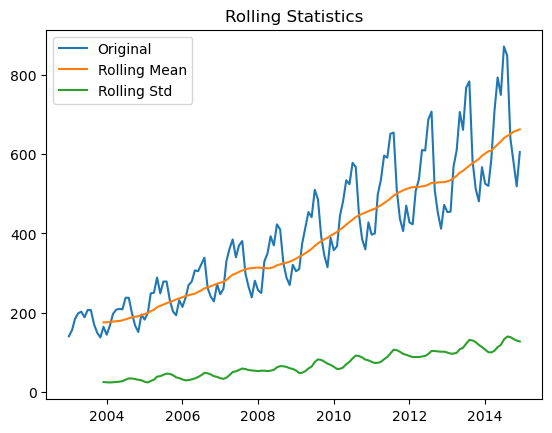

In [39]:
#Rolling Statistics

roll_mean = df1.rolling(window=12).mean()
roll_std = df1.rolling(window=12).std()

#Plot

orig = plt.plot(df1,label='Original')
mean = plt.plot(roll_mean,label='Rolling Mean')
std = plt.plot(roll_std,label='Rolling Std')
plt.legend()
plt.title("Rolling Statistics")
plt.show()

#### 4. Code to test the stationarity of data.

In [40]:
def test_stationarity(data):
    print("Results of ADF test:")
    adf_test = adfuller(data,autolag='AIC')
    adf_output = pd.Series(adf_test[0:4],index=['Test-Statistic','p-value','#Lags Used', 'Number of Observations Used'])
    for key,value in adf_test[4].items():
        adf_output['Critical Value (%s)' % key] = value
    print(adf_output)

test_stationarity(df1)

Results of ADF test:
Test-Statistic                   1.108825
p-value                          0.995291
#Lags Used                      14.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


#### 5. Code to perform the decomposition of data if there is an existence of seasonality and split the data accordingly.

[]

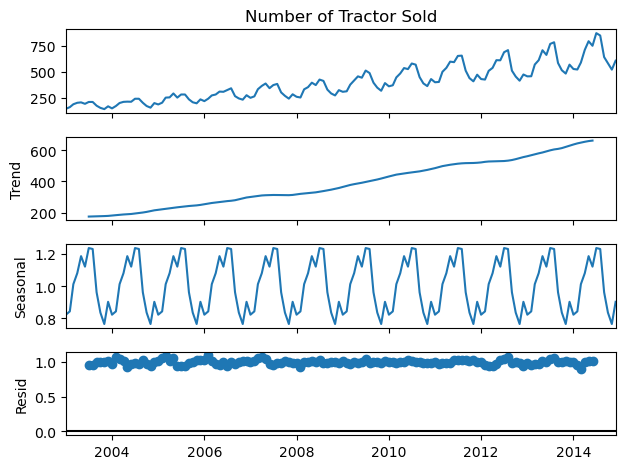

In [41]:
decomposition = seasonal_decompose(df1,model='multiplicative')
decomposition.plot()
plt.plot()

<Axes: >

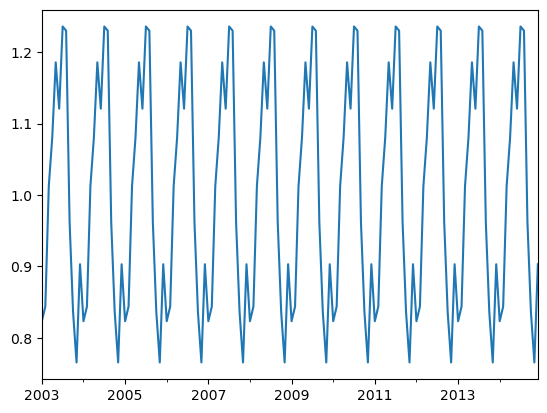

In [42]:
seasonal = decomposition.seasonal
seasonal.plot()

#### 6. code which represent the distribution of the data, if there is an existence of seasonality in an visualisation plot and provide inferences accordingly.

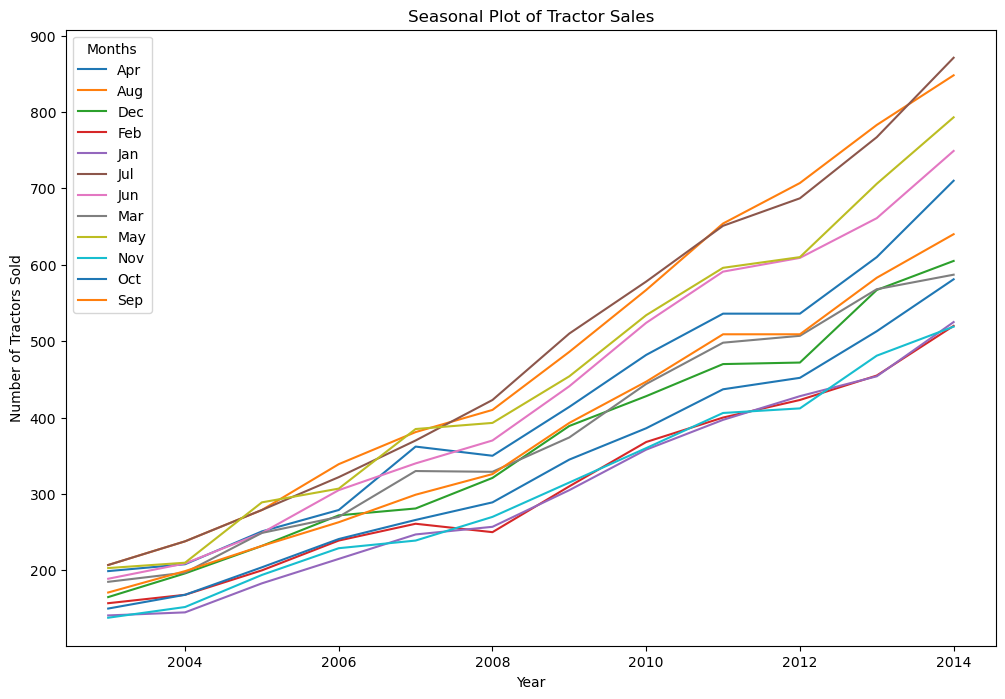

<Figure size 1200x600 with 0 Axes>

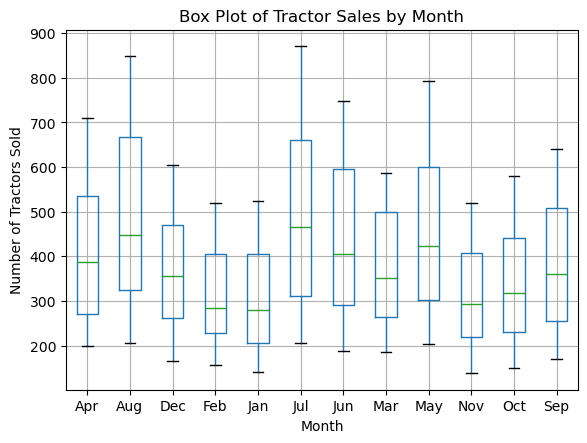

In [43]:
# Seasonal plot: showing the data for each season over different years
fig, ax = plt.subplots(figsize=(12, 8))
df_tractor.groupby(['Year', 'Months'])['Number of Tractor Sold'].mean().unstack().plot(ax=ax)
plt.title('Seasonal Plot of Tractor Sales')
plt.ylabel('Number of Tractors Sold')
plt.show()

# Box plot: distribution of tractor sales for each month
plt.figure(figsize=(12, 6))
df_tractor.boxplot(column='Number of Tractor Sold', by='Months')
plt.title('Box Plot of Tractor Sales by Month')
plt.suptitle('')  # Suppress the default title to keep the plot clean
plt.xlabel('Month')
plt.ylabel('Number of Tractors Sold')
plt.show()


Inferences:

The seasonal plot shows an upward trend in tractor sales over the years. This indicates that overall tractor sales are increasing annually.

There are clear seasonal patterns in tractor sales, with certain months showing consistently higher sales across different years.

The seasonal patterns are consistent across the years, which means that the same months tend to have higher or lower sales year after year. This consistency suggests predictable seasonality in the data.

The box plot shows the distribution of tractor sales for each month, highlighting the central tendency and variability of sales.
Months like August and July have higher median sales compared to other months, reaffirming the seasonal peaks observed in the seasonal plot.

The spread of the boxes (interquartile range) and the length of the whiskers indicate the variability in sales within each month.
Months like August and July not only have higher median sales but also show a higher range of sales values, indicating greater variability

Some months, such as August and July, have significant outliers, indicating that there were periods with exceptionally high sales.
These outliers suggest that while sales are generally higher in these months, there can be occasional spikes in demand.

Both the seasonal plot and box plot indicate the existence of seasonality in tractor sales, with certain months consistently showing higher sales year over year.

The strong seasonal patterns suggest that incorporating seasonality into predictive models (e.g., SARIMA) can improve the accuracy of forecasts for future tractor sales.

#### 7. After the decomposition of the data, providing the detailed inferences as per the interpretation.

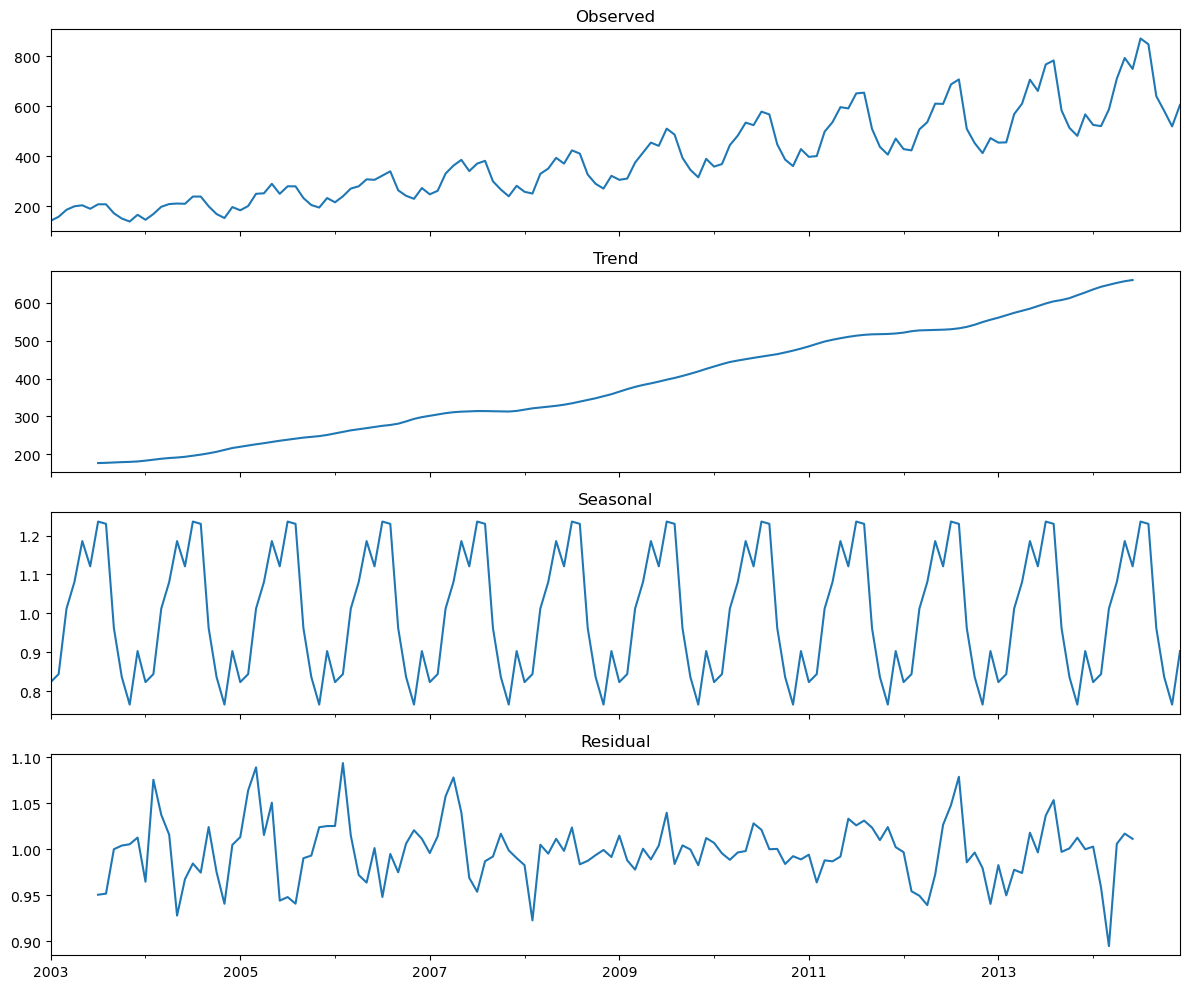

In [77]:
# Assuming df1 is a DataFrame with a datetime index and a 'Number of Tractor Sold' column
decomp_se = seasonal_decompose(df1, model='multiplicative', period=12)

# Plotting the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
decomp_se.observed.plot(ax=ax1, title='Observed')
decomp_se.trend.plot(ax=ax2, title='Trend')
decomp_se.seasonal.plot(ax=ax3, title='Seasonal')
decomp_se.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()
plt.show()

The seasonal plot shows an upward trend in tractor sales over the years. This indicates that overall tractor sales are increasing annually.

The seasonal patterns are consistent across the years, which means that the same months tend to have higher or lower sales year after year. This consistency suggests predictable seasonality in the data.

The strong seasonal patterns suggest that incorporating seasonality into predictive models (e.g., SARIMA) can improve the accuracy of forecasts for future tractor sales.




#### 8. Code to perform the differencing if the data was non-stationary and to represent it in all the possible visualisation plot for better interpretation and providing the inferences, i.e which include ACF,PACF.

In [44]:
print("ADF Test for Original Data:")
test_stationarity(df1)

ADF Test for Original Data:
Results of ADF test:
Test-Statistic                   1.108825
p-value                          0.995291
#Lags Used                      14.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


In [45]:
df1_diff = df1.diff().dropna()

In [46]:
print("\nADF Test for Differenced Data:")
test_stationarity(df1_diff)


ADF Test for Differenced Data:
Results of ADF test:
Test-Statistic                  -2.543481
p-value                          0.105250
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [47]:
df1_diff = df1.diff().diff().dropna()

In [48]:
print("\nADF Test for second order Differenced Data:")
test_stationarity(df1_diff)


ADF Test for second order Differenced Data:
Results of ADF test:
Test-Statistic                -8.639257e+00
p-value                        5.482545e-14
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


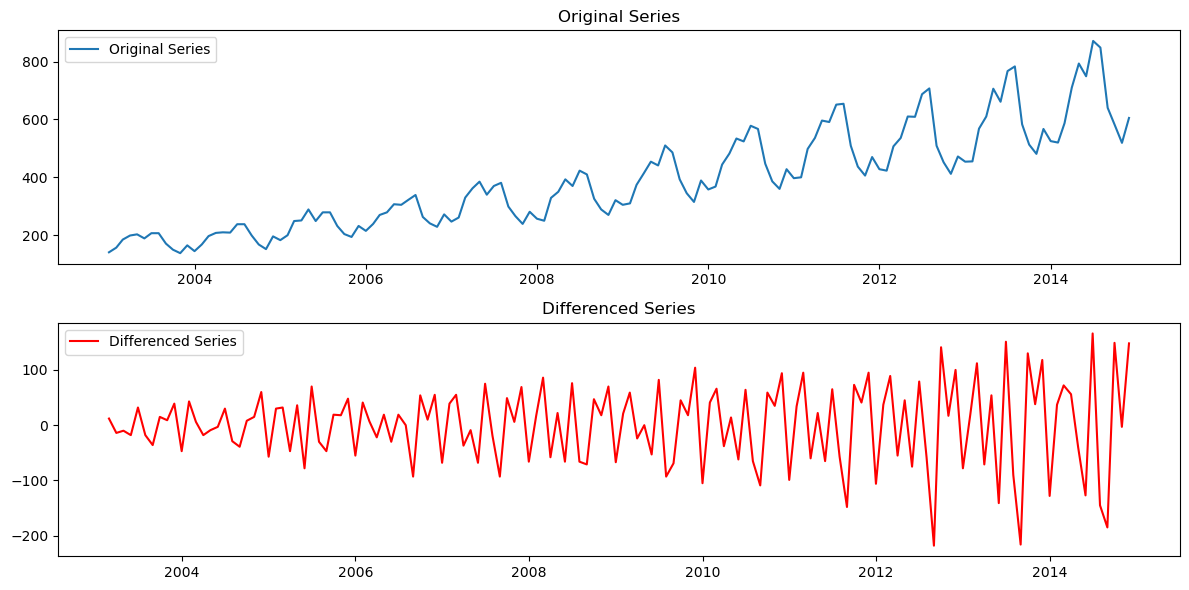

In [49]:
# Plot the original and differenced series
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(df1, label='Original Series')
plt.title('Original Series')
plt.legend(loc='best')

plt.subplot(212)
plt.plot(df1_diff, label='Differenced Series', color='red')
plt.title('Differenced Series')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

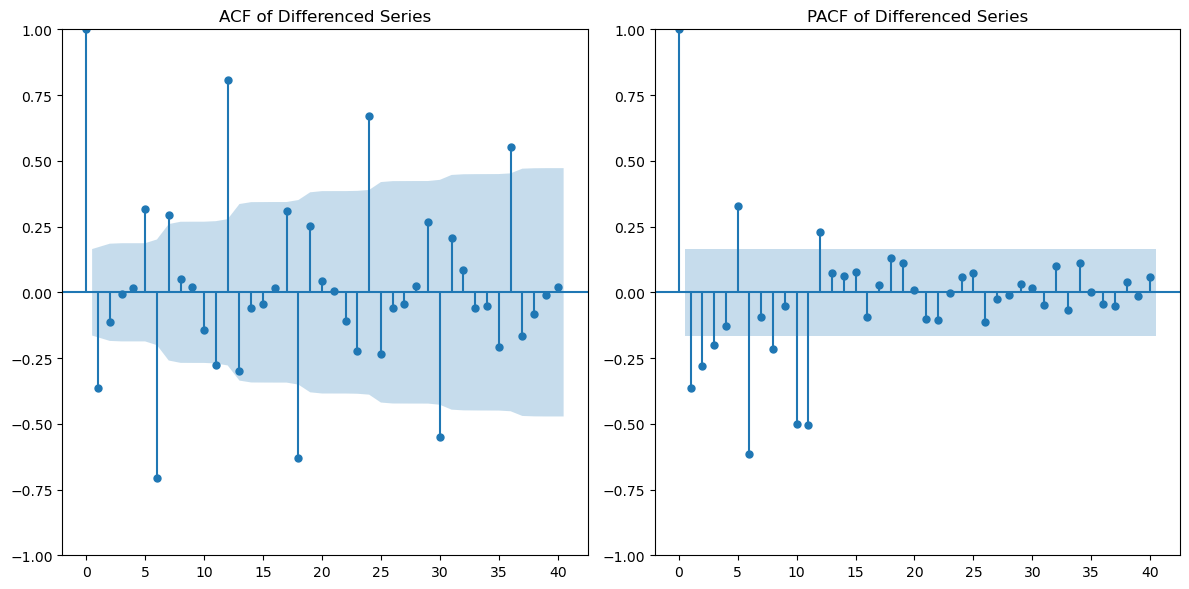

In [50]:
# Plot ACF and PACF for the differenced series
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df1_diff, ax=plt.gca(), lags=40)
plt.title('ACF of Differenced Series')

plt.subplot(122)
plot_pacf(df1_diff, ax=plt.gca(), lags=40, method='ywm')
plt.title('PACF of Differenced Series')
plt.tight_layout()
plt.show()

#### 9. Code to fit the model  and perform predictions on test data and to provide the inference's accorindly i.e if non stationary with ARIMA, if seasonality and non stationary with SARIMA .

In [52]:
d = q = range(0,2)
p = range(0,4)

pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1),
 (2, 0, 0),
 (2, 0, 1),
 (2, 1, 0),
 (2, 1, 1),
 (3, 0, 0),
 (3, 0, 1),
 (3, 1, 0),
 (3, 1, 1)]

In [53]:
seasonal_pdq = [(x[0],x[1],x[2],12) for x in pdq]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (3, 0, 0, 12),
 (3, 0, 1, 12),
 (3, 1, 0, 12),
 (3, 1, 1, 12)]

In [58]:
# Calculate the number of training samples
train_size = int(len(df1) * 0.8)

# Split the dataset into training and testing sets
train, test = df1[:train_size], df1[train_size:]

In [62]:

# Initialize lists to store AIC values and corresponding model parameters
AIC = []
ARIMA_model = []

# Loop through each combination of ARIMA parameters
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        
        model_arima_fit = model_arima.fit()
        
        # Print and store the AIC value
        print("ARIMA{} : AIC:{}".format(param, model_arima_fit.aic), end='\n')
        AIC.append(model_arima_fit.aic)
        ARIMA_model.append(param)
    except Exception as e:
        print(f"Error fitting ARIMA{param}: {e}")
        continue

#Find the model with the lowest AIC
min_aic_index = AIC.index(min(AIC))
best_model_params = ARIMA_model[min_aic_index]
print(f"\nBest ARIMA model: {best_model_params} with AIC: {AIC[min_aic_index]}")

ARIMA(0, 0, 0) : AIC:1453.4845166708944
ARIMA(0, 0, 1) : AIC:1326.3353953083683
ARIMA(0, 1, 0) : AIC:1187.387990014453
ARIMA(0, 1, 1) : AIC:1185.965396207579
ARIMA(1, 0, 0) : AIC:1203.505570437032
ARIMA(1, 0, 1) : AIC:1201.4008553162957
ARIMA(1, 1, 0) : AIC:1185.9359746831826
ARIMA(1, 1, 1) : AIC:1187.913637863395
ARIMA(2, 0, 0) : AIC:1201.0907611524322
ARIMA(2, 0, 1) : AIC:1203.0662813379945
ARIMA(2, 1, 0) : AIC:1187.9062185325713
ARIMA(2, 1, 1) : AIC:1182.178174791489
ARIMA(3, 0, 0) : AIC:1203.0666367007464
ARIMA(3, 0, 1) : AIC:1205.0000617563048
ARIMA(3, 1, 0) : AIC:1189.8237100448991
ARIMA(3, 1, 1) : AIC:1191.808016959521

Best ARIMA model: (2, 1, 1) with AIC: 1182.178174791489


In [63]:
# Best ARIMA model parameters
best_model_params = (2, 1, 1)

# Fit the best ARIMA model on the training data
best_model_arima = ARIMA(train, order=best_model_params)
best_model_fit = best_model_arima.fit()

print(best_model_fit.summary())

# Make predictions with the best model
start = len(train)
end = len(train) + len(test) - 1
predictions = best_model_fit.predict(start=start, end=end, typ='levels')

                                 SARIMAX Results                                  
Dep. Variable:     Number of Tractor Sold   No. Observations:                  115
Model:                     ARIMA(2, 1, 1)   Log Likelihood                -587.089
Date:                    Thu, 30 May 2024   AIC                           1182.178
Time:                            13:03:07   BIC                           1193.123
Sample:                        01-01-2003   HQIC                          1186.620
                             - 07-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0111      0.168      6.017      0.000       0.682       1.340
ar.L2         -0.2858      0.118     -2.426      0.015      -0.517      -0.055
ma.L1         -0.881

In [64]:
print(predictions)

2012-08-01    678.901337
2012-09-01    648.418420
2012-10-01    619.911238
2012-11-01    599.799697
2012-12-01    587.612467
2013-01-01    581.038020
2013-02-01    577.873837
2013-03-01    576.553587
2013-04-01    576.123048
2013-05-01    576.065078
2013-06-01    576.129521
2013-07-01    576.211250
2013-08-01    576.275469
2013-09-01    576.317042
2013-10-01    576.340722
2013-11-01    576.352783
2013-12-01    576.358210
2014-01-01    576.360250
2014-02-01    576.360761
2014-03-01    576.360695
2014-04-01    576.360483
2014-05-01    576.360286
2014-06-01    576.360149
2014-07-01    576.360065
2014-08-01    576.360021
2014-09-01    576.359999
2014-10-01    576.359990
2014-11-01    576.359988
2014-12-01    576.359987
Freq: MS, Name: predicted_mean, dtype: float64


In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [78]:
# Calculate evaluation metrics
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 31.461848985133035
Mean Squared Error (MSE): 1766.0567987553325
Root Mean Squared Error (RMSE): 42.02447856613253


Mean Absolute Error (MAE): 106.20950206115722
Mean Squared Error (MSE): 17768.238285780655
Root Mean Squared Error (RMSE): 133.29755543812743


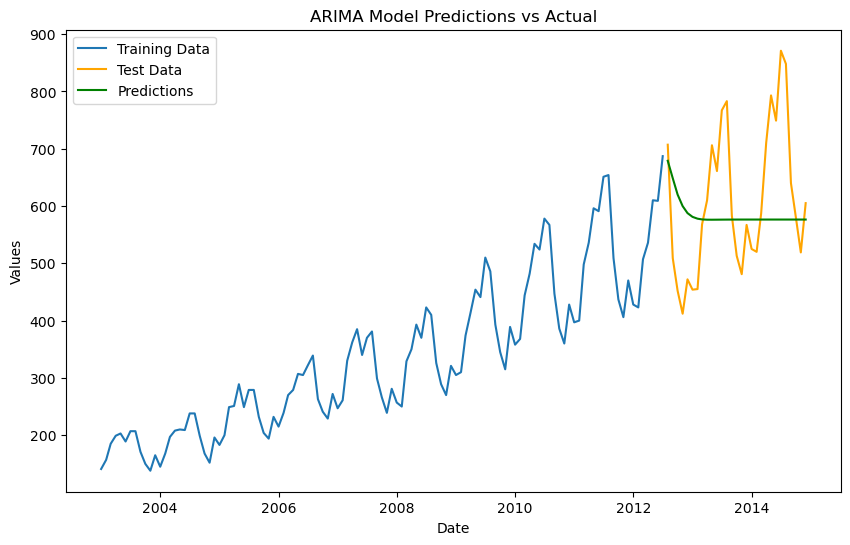

In [67]:
# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data', color='orange')
plt.plot(test.index, predictions, label='Predictions', color='green')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('ARIMA Model Predictions vs Actual')
plt.legend()
plt.show()

In [68]:
#Consider Seasonality and Fit SARIMAX

In [69]:
#SARIMAX Model since there is seasonality as seen above

AIC = []
SARIMAX_model = []
for param in pdq:
    for params in seasonal_pdq:
        #try:
            model_sarima = SARIMAX(train,order=param,seasonal_order=params,enforce_stationarity=False,enforce_invertibility=False)
            results = model_sarima.fit()
            print("SARIMAX{}x{} : AIC:{}".format(param,params,results.aic),end='\n')
            AIC.append(results.aic)
            SARIMAX_model.append([param,params])
        #except:
            #continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12) : AIC:1668.1552251214764
SARIMAX(0, 0, 0)x(0, 0, 1, 12) : AIC:1400.9621608513814
SARIMAX(0, 0, 0)x(0, 1, 0, 12) : AIC:1074.8275183505664
SARIMAX(0, 0, 0)x(0, 1, 1, 12) : AIC:919.3704253196755
SARIMAX(0, 0, 0)x(1, 0, 0, 12) : AIC:937.4300716855333
SARIMAX(0, 0, 0)x(1, 0, 1, 12) : AIC:921.3841118995722
SARIMAX(0, 0, 0)x(1, 1, 0, 12) : AIC:883.4679447930164
SARIMAX(0, 0, 0)x(1, 1, 1, 12) : AIC:841.0592986302677
SARIMAX(0, 0, 0)x(2, 0, 0, 12) : AIC:835.8818301280112
SARIMAX(0, 0, 0)x(2, 0, 1, 12) : AIC:833.6146250821542
SARIMAX(0, 0, 0)x(2, 1, 0, 12) : AIC:753.3280652931408
SARIMAX(0, 0, 0)x(2, 1, 1, 12) : AIC:736.9786679209388
SARIMAX(0, 0, 0)x(3, 0, 0, 12) : AIC:724.556304244449
SARIMAX(0, 0, 0)x(3, 0, 1, 12) : AIC:719.45591229366
SARIMAX(0, 0, 0)x(3, 1, 0, 12) : AIC:646.8691446312998
SARIMAX(0, 0, 0)x(3, 1, 1, 12) : AIC:631.6731116602439
SARIMAX(0, 0, 1)x(0, 0, 0, 12) : AIC:1509.3844081151458
SARIMAX(0, 0, 1)x(0, 0, 1, 12) : AIC:1258.899895062114
SARIMAX(0

In [70]:
min(AIC)

516.1699317400792

In [71]:
AIC.index(min(AIC))

255

In [72]:
#Find the model with the lowest AIC
min_aic_index = AIC.index(min(AIC))
best_model_params = SARIMAX_model[min_aic_index]
print(f"\nBest SARIMA model: {best_model_params} with AIC: {AIC[min_aic_index]}")


Best SARIMA model: [(3, 1, 1), (3, 1, 1, 12)] with AIC: 516.1699317400792


In [73]:
# Fit the best SARIMAX model on the training data
best_model_sarima = SARIMAX(train, order=best_model_params[0], seasonal_order=best_model_params[1],
                           enforce_stationarity=False, enforce_invertibility=False)
best_model_fit = best_model_sarima.fit()

print(best_model_fit.summary())

# Make predictions with the best model
start = len(train)
end = len(train) + len(test) - 1
predictions = best_model_fit.predict(start=start, end=end, typ='levels')

                                     SARIMAX Results                                      
Dep. Variable:             Number of Tractor Sold   No. Observations:                  115
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -249.085
Date:                            Thu, 30 May 2024   AIC                            516.170
Time:                                    13:10:09   BIC                            535.458
Sample:                                01-01-2003   HQIC                           523.756
                                     - 07-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7780      0.134      5.827      0.000       0.516       1.040
ar.L2          0.2122      0.184   

In [75]:
# Calculate evaluation metrics
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 31.461848985133035
Mean Squared Error (MSE): 1766.0567987553325
Root Mean Squared Error (RMSE): 42.02447856613253


An MAE of 31.46 means that, on average, the model's predictions are 31.46 units away from the actual sales numbers. This metric is straightforward to interpret and less sensitive to outliers compared to MSE and RMSE.

An RMSE of 42.02 suggests that the model's predictions are, on average, 42.02 units away from the actual sales numbers. 


he MAE and RMSE values suggest that the model is reasonably accurate but not perfect. On average, the model's predictions are off by around 31 to 42 units from the actual values. 


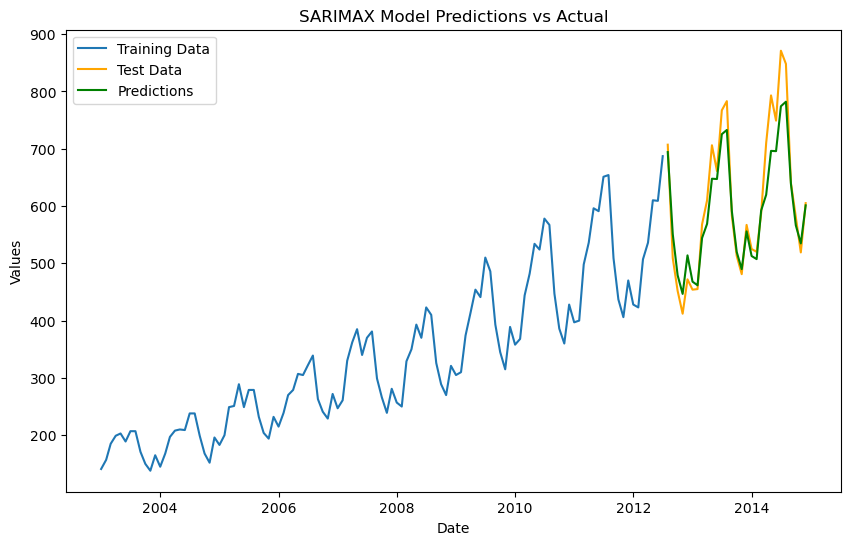

In [76]:
# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data', color='orange')
plt.plot(test.index, predictions, label='Predictions', color='green')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('SARIMAX Model Predictions vs Actual')
plt.legend()
plt.show()

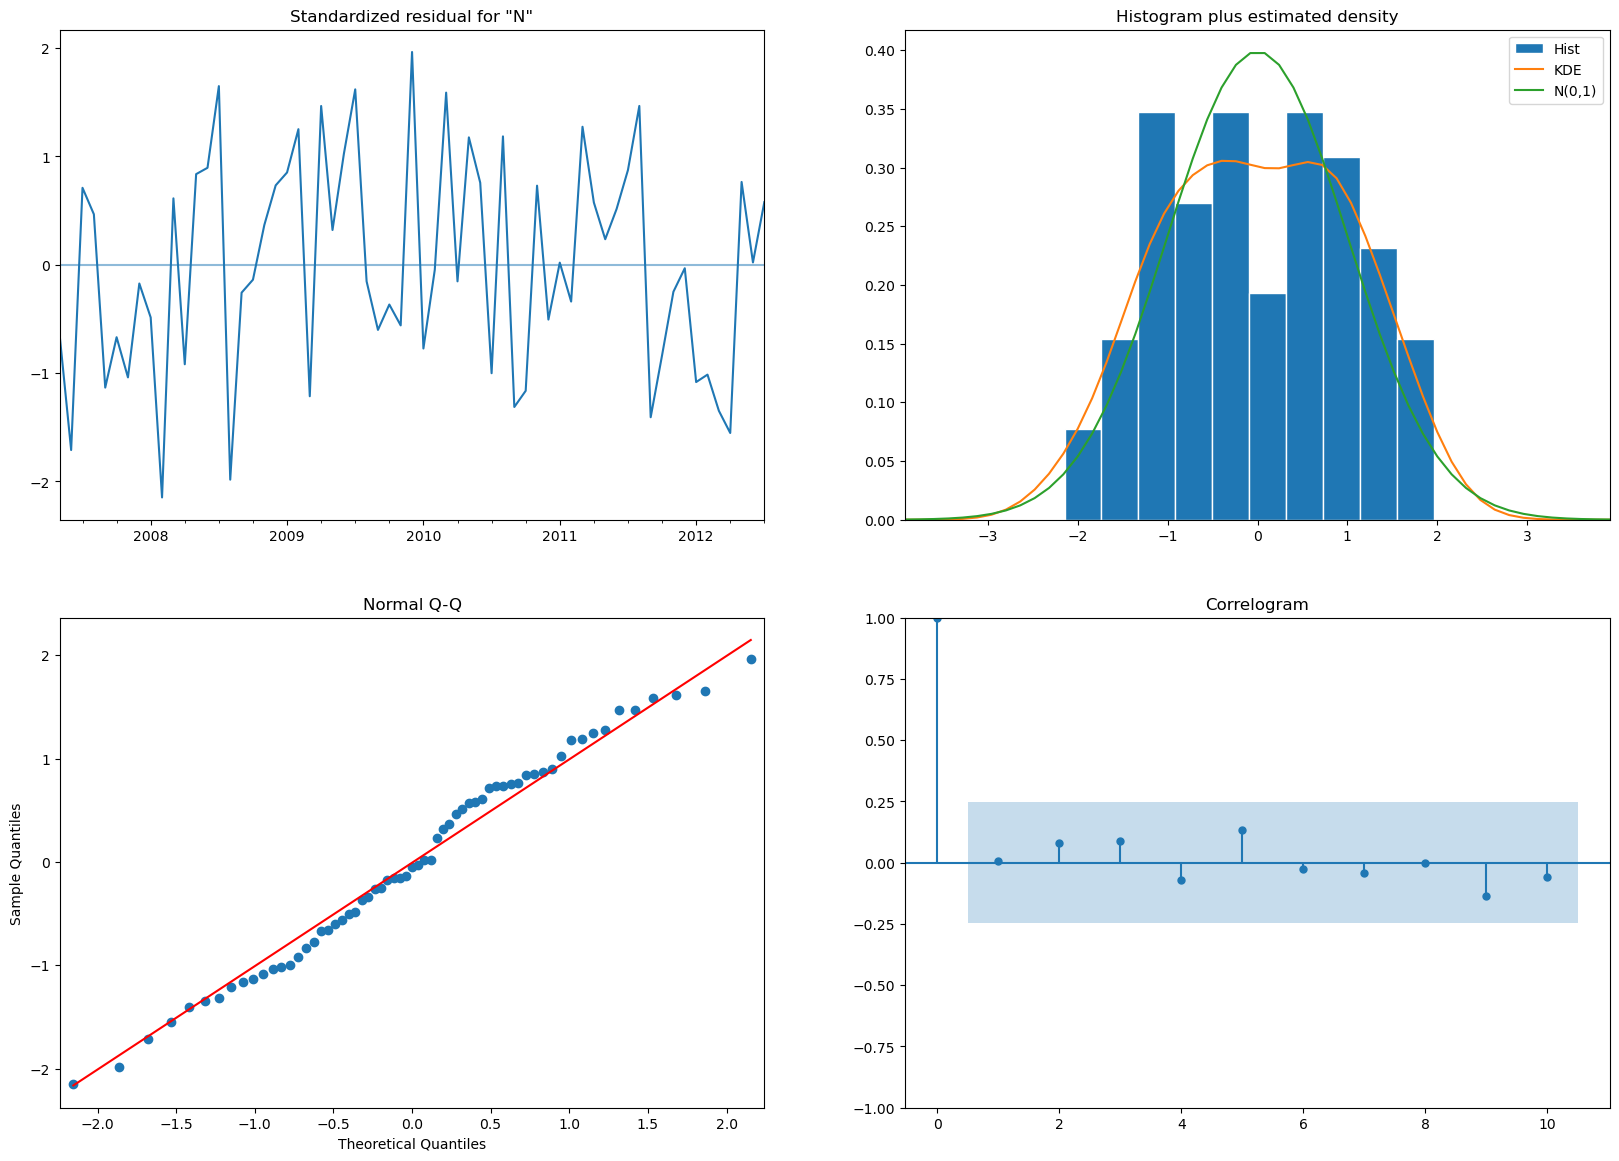

In [74]:
results.plot_diagnostics(figsize=(20,14))
plt.show()

Residual Plot Inference:


Most of the points lie close to the red line, with some deviation at the tails. This suggests that the residuals are approximately normally distributed, though there may be slight deviations at the extremes.

Correlogram (ACF Plot)

Most of the autocorrelation coefficients lie within the blue confidence interval, suggesting that there is no significant autocorrelation in the residuals. This indicates that the residuals are uncorrelated, which is a good sign. The exception is the lag 1, which shows a significant autocorrelation, suggesting a possible underfitting at the first lag.

The histogram and Q-Q plot indicate that the residuals are approximately normally distributed, although there might be minor deviations at the tails.


### END